In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import lightgbm as lgb
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

## Reading the dataset

Collecting the data from the train dataset and I have kept the backup data so that I keep the initial data intact.

Following steps to be taken :
    
    1. Viewing initial data from the training set.
    2. Checked if initial columns had any data that need to be removed from the dataset or not including in the feature list.
    3. Initial looking at the columns and trying to understand how to approach the problem
    4. Looking at the shape of the data(dimensions of the data)


In [2]:
#os.getcwd()
train_data_path='C:\\Users\\abirp\\OneDrive\\Desktop\\Animal State Prediction\\train.csv'
test_data_path='C:\\Users\\abirp\\OneDrive\\Desktop\\Animal State Prediction\\test.csv'
train_data=pd.read_csv (train_data_path)
backup_data=train_data
#Reading test set data
#os.getcwd()
test_data=pd.read_csv (test_data_path)
master_test_data=test_data

In [3]:
pd.set_option('max_columns',None)
train_data.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10 years,2007-07-09 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7 years,2007-07-09 00:00:00,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6 years,2007-07-09 00:00:00,Neutered Male,2190,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10 years,2004-04-02 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16 years,1997-10-16 00:00:00,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner


In [4]:
train_data['count'].unique() # drop column 
#sns.countplot(x='count',data=train_data)

array([1], dtype=int64)

In [5]:
train_data.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_type', 'breed', 'color', 'intake_condition', 'intake_type',
       'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'age_upon_outcome', 'date_of_birth',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'outcome_type'],
      dtype='object')


 Just checking from the column details I am thinking most of them are derived from one variable or another.However, I need to confirm the logic.For this, I checked for collinearity with variables to each other. I used R since I find it faster to create plots and perform statistical analysis compared to the Python.After performing analysis on numerical data  I found out that it was a clear case of multicollinearity and based on the analysis I selected on the features that was important and then created a model.

In [6]:
train_data.shape
# there are 47803 rows and 37 columns

(47803, 37)

Since they are a lot of rows and many of them are correlated , For e.g. for date time extracted values,most of the values are extracted from each other. I will confirm by performing multicollinearity checks between these variables.Outcome variables are around 9 which is a clear cut model building for multinomial classification.

In [7]:
train_data['outcome_type'].unique()

array(['Return to Owner', 'Missing', 'Transfer', 'Adoption', 'Euthanasia',
       'Rto-Adopt', 'Relocate', 'Died', 'Disposal'], dtype=object)

PLotting was done on the outcome variable and I found out that there is a lot of difference in the output variable for which I am thinking of a solution where we can create samples on the training dataset so that they can make interpretation a little better.For this, I was thinking of using SMOTE.

A little introduction on SMOTE:
    
    The Synthetic Minority Over-sampling TEchnique (SMOTE) is an oversampling approach that creates synthetic minority class samples. It potentially performs better than simple oversampling and it is widely used.In our case we can train each of the sample to the same level so that our models can build a little better.

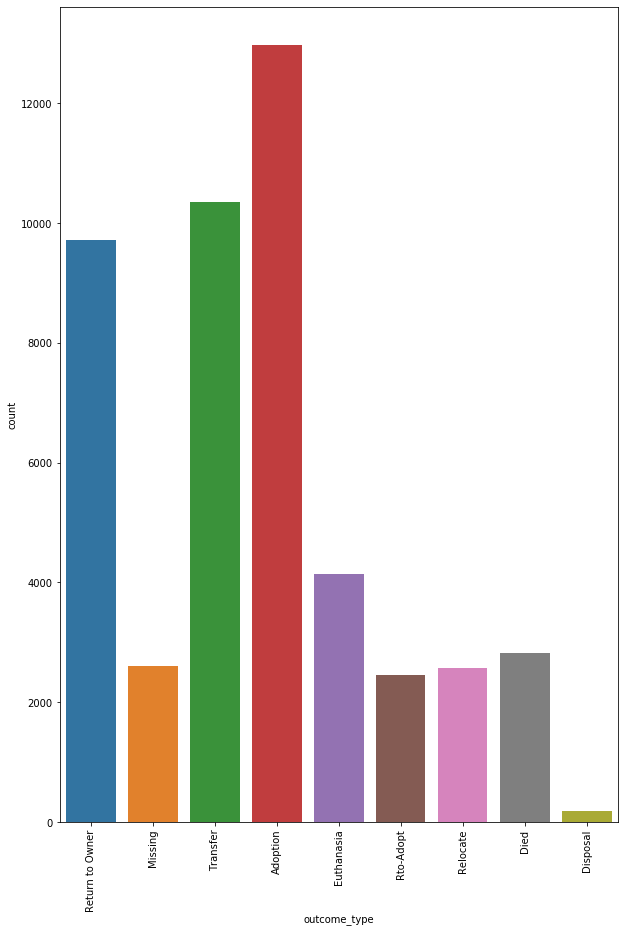

In [8]:
plt.figure(figsize=(10,15))
plt.xticks(rotation=90)
sns.countplot(x="outcome_type",data=train_data)


Checking for null values on all the variables.Except for outcome_datetime variable rest all pretty looks good. So I think we don't need to do any imputation around here much.

In [9]:
#Checking for null values
train_data.isnull().sum()

animal_id_outcome                0
dob_year                         0
dob_month                        0
age_upon_intake                  0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
count                            0
age_upon_intake_(days)           0
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_datetime                  0
intake_month                     0
intake_year                      0
intake_monthyear                 0
intake_weekday                   0
intake_hour                      0
intake_number                    0
time_in_shelter                  0
time_in_shelter_days             0
age_upon_outcome                 0
date_of_birth                    0
sex_upon_outcome                 1
age_upon_outcome_(days)          0
age_upon_outcome_(years)         0
age_upon_outcome_age

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 37 columns):
animal_id_outcome             47803 non-null object
dob_year                      47803 non-null int64
dob_month                     47803 non-null int64
age_upon_intake               47803 non-null object
animal_type                   47803 non-null object
breed                         47803 non-null object
color                         47803 non-null object
intake_condition              47803 non-null object
intake_type                   47803 non-null object
sex_upon_intake               47802 non-null object
count                         47803 non-null int64
age_upon_intake_(days)        47803 non-null int64
age_upon_intake_(years)       47803 non-null float64
age_upon_intake_age_group     47803 non-null object
intake_datetime               47803 non-null object
intake_month                  47803 non-null int64
intake_year                   47803 non-null int64
intake_month

## Data Manipulation

For Data Manipulation, I have converted the object variables to the categorical variables.After conversion of object variables, I gave cat codes to each of the variables that can help in our analysis.

In [11]:
obj_type_variables_list=['animal_type'
,'breed'
,'color'
,'intake_condition'
,'intake_type'
,'sex_upon_intake'
,'intake_weekday'
,'sex_upon_outcome']



for column in obj_type_variables_list:
      train_data[column] = train_data[column].astype('category')

In [12]:
train_data[obj_type_variables_list] = train_data[obj_type_variables_list].apply(lambda column: column.cat.codes)

In [13]:
#Converting target_variable

target = 'outcome_type'
label_data = train_data[target].astype('category').cat.codes

type(label_data)
label_data_codes = train_data[target].astype('category')
categorical_data_output = dict(enumerate(label_data_codes.cat.categories))
for key,value in categorical_data_output.items():
    print(key,'->',value)

if 'outcome_type' in train_data.columns:
    train_data.drop('outcome_type', axis = 1)


0 -> Adoption
1 -> Died
2 -> Disposal
3 -> Euthanasia
4 -> Missing
5 -> Relocate
6 -> Return to Owner
7 -> Rto-Adopt
8 -> Transfer


In [14]:
#Selecting our variables
obj_type_variables_list=['animal_type'
,'breed'
,'color'
,'intake_condition'
,'intake_type'
,'sex_upon_intake'
,'intake_weekday'
,'sex_upon_outcome']

Numerical_variables_list=['dob_year'
,'dob_month'
,'age_upon_intake_(days)'  
,'intake_month'
,'intake_year'
,'intake_hour'
,'time_in_shelter_days'
,'age_upon_outcome_(days)'
,'outcome_month'
,'outcome_year'
,'outcome_hour'
,'outcome_number']

final_variables_list=obj_type_variables_list+Numerical_variables_list

In [15]:
train_data=train_data[final_variables_list]

In [16]:
#list of columns with null values 
list_of_clm_null_value= train_data.columns[train_data.isna().any()].tolist()
print(list_of_clm_null_value)

null_columns=train_data.columns[train_data.isnull().any()]
count = train_data[null_columns].isnull().sum()
print(count)

[]
Series([], dtype: float64)


In [17]:
# replacing the NaN value with -1 after EDA
for i in list_of_clm_null_value:
    master_data[i].fillna(-1, inplace = True)

In [18]:
print(len(train_data))
print(len(label_data))

47803
47803


## Model Building

In the baseline model created, the score came around to be 0.53 with the lightgbm model.I am trying to find out if we use the most important features and then build a model.Stratified sampling aims at splitting a data set so that each split is similar with respect to something. In a classification setting, it is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.

In [19]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
for train_index, test_index in splitter.split(train_data, label_data):
        features_train, features_test = train_data.iloc[train_index], train_data.iloc[test_index]
        labels_train, labels_test = label_data[train_index], label_data[test_index]

Below is the analysis done by using the SelectKBest variables.
   
       ('animal_type', 1066.3226267654773),
     ('sex_upon_intake', 809.7026971648814),
     ('age_upon_intake_(days)', 740.5865298198345),
     ('age_upon_outcome_(days)', 722.040970361172),
     ('dob_year', 659.8329894584039),
     ('sex_upon_outcome', 520.4861621197217),
     ('outcome_hour', 416.0506441209344),
     ('intake_number', 331.2534711638701),
     ('outcome_number', 331.2534711638701),
     ('time_in_shelter_days', 330.94610840540565),
     ('intake_condition', 229.5217307137921),
     ('intake_type', 224.2067914473308),
     ('intake_year', 115.37814494343742),
     ('outcome_year', 107.73541976622242),
     ('breed', 63.780063245589346),
     ('color', 51.242250507411114),
     ('outcome_month', 11.759134728667924),
     ('intake_month', 11.573114838901132),
     ('intake_hour', 10.651649392346242),
     ('intake_weekday', 3.4730350652306305),
     ('dob_month', 3.0707004058357406)]

In [20]:
selectKbest_feature_list=['animal_type'
                         ,'sex_upon_intake'
                         ,'age_upon_intake_(days)'
                         ,'age_upon_outcome_(days)'
                         ,'dob_year'
                         ,'sex_upon_outcome'
                         ,'outcome_hour'
                         ,'intake_number'
                         ,'time_in_shelter_days'
                         ,'intake_condition'
                         ,'intake_type']

In [21]:
features_train.head()

,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,intake_weekday,sex_upon_outcome,dob_year,dob_month,age_upon_intake_(days),intake_month,intake_year,intake_hour,time_in_shelter_days,age_upon_outcome_(days),outcome_month,outcome_year,outcome_hour,outcome_number
42307,1,821,131,3,1,1,6,2,2014,12,330,11,2015,17,12.278472,330,11,2015,0,1.0
11903,3,1681,46,7,4,4,6,4,2013,3,365,3,2014,18,0.005556,365,3,2014,18,1.0
44943,2,476,7,3,1,1,6,2,2014,1,730,1,2016,13,2.141667,730,1,2016,17,1.0
3619,2,271,46,3,3,2,5,2,2013,2,1095,5,2016,15,0.117361,1095,5,2016,18,1.0
19095,1,821,100,3,1,2,5,2,2007,7,2555,7,2014,12,4.111806,2555,8,2014,15,1.0


In [22]:
features_test.head()

,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,intake_weekday,sex_upon_outcome,dob_year,dob_month,age_upon_intake_(days),intake_month,intake_year,intake_hour,time_in_shelter_days,age_upon_outcome_(days),outcome_month,outcome_year,outcome_hour,outcome_number
13923,1,821,46,3,3,0,5,0,2014,4,21,5,2014,14,0.123611,21,5,2014,16,1.0
20793,2,702,313,3,3,3,2,3,2004,8,3650,8,2014,15,1.793056,3650,9,2014,10,1.0
11712,1,821,404,3,3,2,3,2,2013,3,365,3,2014,12,4.088889,365,3,2014,14,2.0
15034,2,568,390,7,1,3,2,3,2013,6,300,5,2014,11,0.112500,300,5,2014,14,1.0
28227,2,586,341,3,3,1,3,2,2014,2,365,2,2015,14,21.150694,365,3,2015,18,3.0


In [23]:
labels_train.head()

42307    4
11903    3
44943    4
3619     6
19095    8
dtype: int8

In [24]:
features_test.head()

,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,intake_weekday,sex_upon_outcome,dob_year,dob_month,age_upon_intake_(days),intake_month,intake_year,intake_hour,time_in_shelter_days,age_upon_outcome_(days),outcome_month,outcome_year,outcome_hour,outcome_number
13923,1,821,46,3,3,0,5,0,2014,4,21,5,2014,14,0.123611,21,5,2014,16,1.0
20793,2,702,313,3,3,3,2,3,2004,8,3650,8,2014,15,1.793056,3650,9,2014,10,1.0
11712,1,821,404,3,3,2,3,2,2013,3,365,3,2014,12,4.088889,365,3,2014,14,2.0
15034,2,568,390,7,1,3,2,3,2013,6,300,5,2014,11,0.112500,300,5,2014,14,1.0
28227,2,586,341,3,3,1,3,2,2014,2,365,2,2015,14,21.150694,365,3,2015,18,3.0


Dimensions of Oversampled dataset is : (81693, 20)


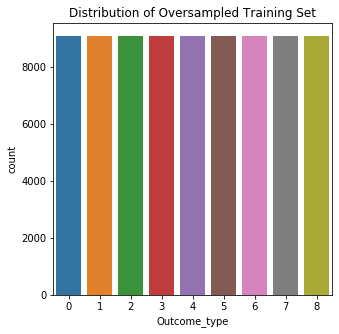

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='all', random_state=47)
os_values, os_labels = smote.fit_sample(features_train, labels_train)

features_train = pd.DataFrame(os_values)
labels_train = pd.DataFrame(os_labels)

plt.figure(figsize=(5, 5))
sns.countplot(data = labels_train, x = 0 )
plt.title("Distribution of Oversampled Training Set")
plt.xlabel("Outcome_type")


print("Dimensions of Oversampled dataset is :", os_values.shape)

## Creating baseline models

I took various classifiers and collected the data and then predict it using test set that we had created using the stratified shuffle.

In [26]:
# Trying untuned, baseline models on 70:30 train-test dataset
gnb = GaussianNB()
y_pred_gnb = gnb.fit(features_train, labels_train.values.ravel()).predict(features_test)

DT = DecisionTreeClassifier()
y_pred_DT = DT.fit(features_train, labels_train.values.ravel()).predict(features_test)

ada = AdaBoostClassifier()
y_pred_ada = ada.fit(features_train, labels_train.values.ravel()).predict(features_test)

logr = LogisticRegression()
y_pred_logr = logr.fit(features_train, labels_train.values.ravel()).predict(features_test)

rf=RandomForestClassifier()
y_pred_rf = rf.fit(features_train, labels_train.values.ravel()).predict(features_test)


C:\Users\abirp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abirp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\abirp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abirp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
# Accuracy Metrics
print("GNB:", accuracy_score(labels_test, y_pred_gnb))
print("DT:", accuracy_score(labels_test, y_pred_DT))
print("ADA:", accuracy_score(labels_test, y_pred_ada))
print("Logr:", accuracy_score(labels_test, y_pred_logr))
print("RF:", accuracy_score(labels_test, y_pred_rf))

GNB: 0.32661599609511194
DT: 0.45164214489923993
ADA: 0.33714524789066314
Logr: 0.388885014991981
RF: 0.5620946935360156


In [28]:
# Precision, Recall, and actual prediction numbers
print("GNB:", classification_report(labels_test, y_pred_gnb))
print("DT:", classification_report(labels_test, y_pred_DT))
print("ADA:", classification_report(labels_test, y_pred_ada))
print("Logr:", classification_report(labels_test, y_pred_logr))
print("RF:", classification_report(labels_test, y_pred_rf))

GNB:               precision    recall  f1-score   support

           0       0.52      0.25      0.34      3890
           1       0.09      0.02      0.04       849
           2       0.03      0.75      0.05        53
           3       0.20      0.29      0.24      1243
           4       0.07      0.19      0.11       780
           5       0.07      0.07      0.07       772
           6       0.58      0.50      0.54      2915
           7       0.04      0.01      0.01       735
           8       0.44      0.52      0.48      3104

    accuracy                           0.33     14341
   macro avg       0.23      0.29      0.21     14341
weighted avg       0.39      0.33      0.34     14341

DT:               precision    recall  f1-score   support

           0       0.52      0.48      0.50      3890
           1       0.08      0.10      0.09       849
           2       0.36      0.49      0.42        53
           3       0.64      0.64      0.64      1243
           4   

In [29]:
# Random Forest Classifier Tune

rf=RandomForestClassifier(criterion='gini',n_estimators=30,max_features='auto',random_state=42,min_samples_split=30)
y_pred_rf = rf.fit(features_train, labels_train.values.ravel()).predict(features_test)


In [30]:
print("RF:", classification_report(labels_test, y_pred_rf))

RF:               precision    recall  f1-score   support

           0       0.53      0.90      0.66      3890
           1       0.36      0.03      0.05       849
           2       0.43      0.42      0.42        53
           3       0.75      0.70      0.72      1243
           4       0.14      0.01      0.01       780
           5       0.17      0.01      0.01       772
           6       0.84      0.81      0.82      2915
           7       0.07      0.00      0.01       735
           8       0.58      0.66      0.61      3104

    accuracy                           0.61     14341
   macro avg       0.43      0.39      0.37     14341
weighted avg       0.55      0.61      0.55     14341



In [31]:

params = {
          "objective" : "multiclass",
          "num_class" : 9,
          "num_leaves" : 60,
          "max_depth": -1,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9, 
          "feature_fraction" : 0.9, 
          "bagging_freq" : 5,   
          "bagging_seed" : 2018,
          "verbosity" : -1 }


lgtrain, lgval = lgb.Dataset(features_train, labels_train), lgb.Dataset(features_test,labels_test)
lgbmodel = lgb.train(params, lgtrain, 2000, valid_sets=[lgtrain, lgval], early_stopping_rounds=100, verbose_eval=200)


Training until validation scores don't improve for 100 rounds
[200]	training's multi_logloss: 1.2876	valid_1's multi_logloss: 1.36918
[400]	training's multi_logloss: 1.06887	valid_1's multi_logloss: 1.2408
[600]	training's multi_logloss: 0.957855	valid_1's multi_logloss: 1.20411
[800]	training's multi_logloss: 0.883534	valid_1's multi_logloss: 1.19098
[1000]	training's multi_logloss: 0.824075	valid_1's multi_logloss: 1.18613
[1200]	training's multi_logloss: 0.774593	valid_1's multi_logloss: 1.1848
Early stopping, best iteration is:
[1270]	training's multi_logloss: 0.758669	valid_1's multi_logloss: 1.18468


In [32]:
y_pred=lgbmodel.predict(features_test)


In [33]:
predictions = []

for x in y_pred:
    predictions.append(np.argmax(x))

In [34]:
print("Lightgbm:", classification_report(labels_test, predictions))

Lightgbm:               precision    recall  f1-score   support

           0       0.54      0.90      0.68      3890
           1       0.49      0.02      0.04       849
           2       0.56      0.43      0.49        53
           3       0.77      0.73      0.75      1243
           4       0.11      0.00      0.00       780
           5       0.60      0.00      0.01       772
           6       0.86      0.82      0.84      2915
           7       0.09      0.00      0.00       735
           8       0.57      0.70      0.63      3104

    accuracy                           0.63     14341
   macro avg       0.51      0.40      0.38     14341
weighted avg       0.59      0.63      0.56     14341



Looking from the classification reports of the following classifiers:
    
        1.GNB:0.34
        2.DT:0.46
        3.ADA:0.35
        4.Logr:0.39
        5.RF:0.53 --> After tuning --> 0.55
        6.Light GBM --> After tuning --> 0.56
        
I performed tuning by checking on the models and using those values I build the model.However, this I tested in the test data that I had created.When I submitted the result of the test data to be done for submission, Light GBM gave a better performance than Random Forest. 

In [35]:
recall_score(labels_test, predictions, average='micro')

0.6286869813820515

In [36]:
obj_type_variables_list=['animal_type'
,'breed'
,'color'
,'intake_condition'
,'intake_type'
,'sex_upon_intake'
,'intake_weekday'
,'sex_upon_outcome']



for column in obj_type_variables_list:
      test_data[column] = test_data[column].astype('category')

In [37]:
test_data[obj_type_variables_list] = test_data[obj_type_variables_list].apply(lambda column: column.cat.codes)

In [38]:
test_data=test_data[final_variables_list]

In [39]:
test_data.head()

,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,intake_weekday,sex_upon_outcome,dob_year,dob_month,age_upon_intake_(days),intake_month,intake_year,intake_hour,time_in_shelter_days,age_upon_outcome_(days),outcome_month,outcome_year,outcome_hour,outcome_number
0,1,455,99,4,3,0,3,3,2013,3,1095,3,2016,11,5.200000,1095,4,2016,16,1
1,1,455,99,4,3,0,3,3,2016,2,28,3,2016,11,34.257639,60,4,2016,17,1
2,1,455,99,4,3,1,3,2,2016,2,28,3,2016,11,32.520139,60,4,2016,0,1
3,1,455,99,4,3,0,3,0,2016,2,28,3,2016,11,31.094444,30,4,2016,13,1
4,1,455,63,4,3,0,3,0,2016,2,28,3,2016,11,37.007639,60,5,2016,11,1


In [40]:
predicted_values=lgbmodel.predict(test_data)
#predicted_values=rf.fit(features_train, labels_train.values.ravel()).predict(test_data)

In [41]:
#test_predictions = predicted_values #for rf
test_predictions=[]
for x in predicted_values:
    test_predictions.append(np.argmax(x))

In [42]:
len(test_predictions)

31869

In [43]:
print(len(test_data))
test_data.head()

31869


,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,intake_weekday,sex_upon_outcome,dob_year,dob_month,age_upon_intake_(days),intake_month,intake_year,intake_hour,time_in_shelter_days,age_upon_outcome_(days),outcome_month,outcome_year,outcome_hour,outcome_number
0,1,455,99,4,3,0,3,3,2013,3,1095,3,2016,11,5.200000,1095,4,2016,16,1
1,1,455,99,4,3,0,3,3,2016,2,28,3,2016,11,34.257639,60,4,2016,17,1
2,1,455,99,4,3,1,3,2,2016,2,28,3,2016,11,32.520139,60,4,2016,0,1
3,1,455,99,4,3,0,3,0,2016,2,28,3,2016,11,31.094444,30,4,2016,13,1
4,1,455,63,4,3,0,3,0,2016,2,28,3,2016,11,37.007639,60,5,2016,11,1


In [44]:
test_predictions_values=[]
for predicted_value in test_predictions:
    test_predictions_values.append(categorical_data_output[predicted_value])

In [45]:
submission=pd.DataFrame()

In [46]:
submission['animal_id_outcome']=master_test_data['animal_id_outcome']
submission['outcome_type']=test_predictions_values

In [47]:
submission.to_csv('submission.csv', index=False)

Study docs/Referrals:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-14-106

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py


Installations:
conda install -c conda-forge imbalanced-learn
conda install -c conda-forge lightgbm